In [1]:
import pandas as pd, matplotlib.pyplot as plt

In [22]:
videoID = "ceAu_Psds9c" #https://www.youtube.com/watch?v=ml6cT4AZdqI

In [23]:
#Get subtitles & count the words
def getData(videoID):
    from youtube_transcript_api import YouTubeTranscriptApi
    data = YouTubeTranscriptApi.get_transcript(videoID, languages = ['es'])
    df = pd.DataFrame(data)
    compList = list(df['text'].str.split(" "))
    flatList = [item for sublist in compList for item in sublist]
    wordsDF = pd.DataFrame(flatList, columns = ['words'])
    count = wordsDF.words.value_counts().to_frame()
    return count

In [24]:
#Exclude not important words
def filterData(df):
    filt = "and that to those of as it in the one seconds switch you a "
    filt += "we go right and the seconds here you to it a left up"
    filt = "and that to those of as it in the one seconds switch you a "
    filt += "we go right and the seconds here you to it a left up"
    filtList = filt.split()
    ret = df[~df.index.isin(filtList)]
    return ret

In [25]:
#Making the chart
def graf(df, n=1):
    top = dataF.head(n)
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize = (15,5))
    ax.bar(top.index, top.words, color = 'tab:red')
    plt.xticks()
    return plt

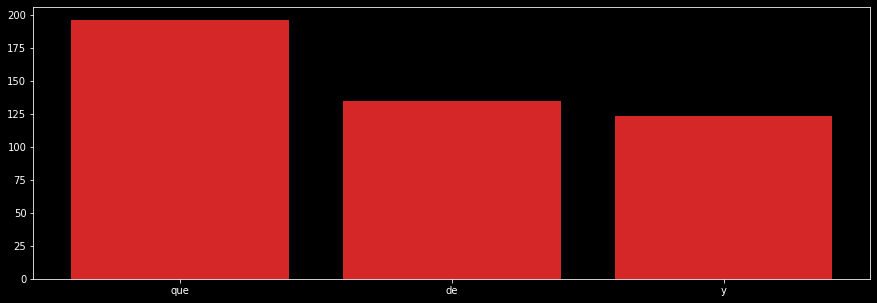

In [26]:
data = getData(videoID)
dataF = filterData(data)
bar = graf(dataF, 3)
bar.show()
dataDict = {}

### All the words the video is mentioning

In [27]:
for idx, row in data.head(200).iterrows():
     dataDict[idx] = row.words
print(dataDict)

{'que': 196, 'de': 135, 'y': 123, 'la': 101, 'en': 87, 'el': 80, 'lo': 68, 'no': 68, 'es': 58, 'a': 48, 'para': 41, 'los': 38, 'todo': 37, 'pero': 32, 'un': 29, 'como': 27, 'se': 26, 'con': 26, 'por': 26, 'más': 21, 'bueno': 21, 'porque': 20, 'muy': 20, 'una': 19, 'tiene': 19, 'te': 19, 'forma': 18, 'si': 18, 'momento': 17, 'las': 17, 'cosas': 17, 'también': 17, 'está': 16, 'eso': 16, 'nosotros': 15, 'hay': 15, 'día': 15, 'este': 15, 'nos': 15, 'mucho': 14, 'estamos': 12, 'importante': 12, 'algo': 12, 'al': 12, 'son': 12, 'me': 11, 'partido': 11, 'todos': 11, 'del': 11, 'va': 10, 'ese': 10, 'después': 10, 'tenemos': 10, 'siempre': 10, 'tener': 9, 'o': 9, 'bien': 9, 'primer': 9, 'boca': 9, 'dos': 8, 'ser': 8, 'jugadores': 8, 'otro': 8, 'idea': 8, 'ver': 8, 'ganar': 8, 'nada': 8, 'gente': 8, 'qué': 7, 'buenos': 7, 'esto': 7, 'ha': 7, 'su': 7, 'primero': 7, 'otra': 7, 'buen': 7, 'uno': 7, 'algún': 7, 'partidos': 6, 'hablando': 6, 'mejor': 6, 'días': 6, 'quiero': 6, 'tampoco': 6, 'jugar': 

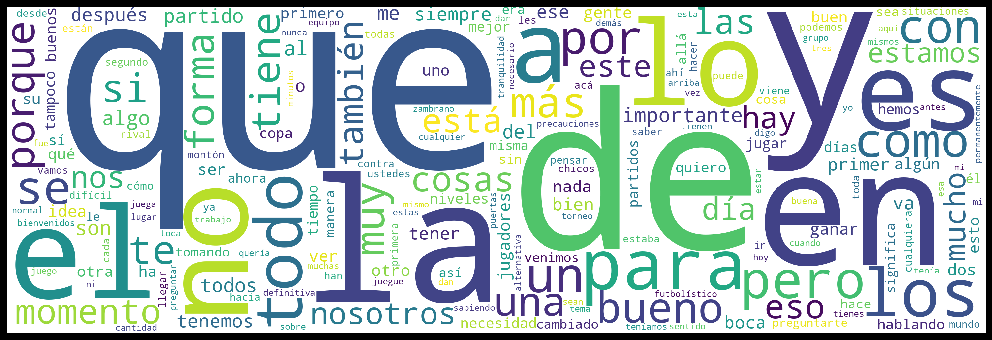

In [28]:
# import sys
# !{sys.executable} -m pip install wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      width=3000,
                      height=1000
                      ).generate_from_frequencies(dataDict)
# use .generate(space_separated_string) - to generate cloud from text

plt.figure(figsize=(20,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()